In [7]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")


In [2]:
train_dir = '/kaggle/input/emotion-detection-fer/train'
test_dir = "../input/emotion-detection-fer/test"


img_size = 48 #original size of the image

In [3]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [4]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [8]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

early_stopping = EarlyStopping(
    monitor='val_loss',       # Metric to watch (can also use 'val_accuracy')
    patience=5,               # Number of epochs with no improvement before stopping
    restore_best_weights=True # Revert to best model weights after stopping
)

In [9]:
history = model.fit(x = train_generator,epochs = 50,validation_data = validation_generator, callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1751880503.861451     110 service.cc:148] XLA service 0x7a7078006f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751880503.862325     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751880504.629856     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/359 ━━━━━━━━━━━━━━━━━━━━ 1:32:25 15s/step - accuracy: 0.0938 - loss: 9.9264

I0000 00:00:1751880512.459957     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


359/359 ━━━━━━━━━━━━━━━━━━━━ 186s 477ms/step - accuracy: 0.1791 - loss: 9.5829 - val_accuracy: 0.1718 - val_loss: 8.8071
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 30s 83ms/step - accuracy: 0.2200 - loss: 8.4830 - val_accuracy: 0.2723 - val_loss: 7.5127
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.2468 - loss: 7.4376 - val_accuracy: 0.3122 - val_loss: 6.4454
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.2753 - loss: 6.4356 - val_accuracy: 0.3443 - val_loss: 5.5628
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.2988 - loss: 5.5132 - val_accuracy: 0.3980 - val_loss: 4.6721
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.3417 - loss: 4.7099 - val_accuracy: 0.3959 - val_loss: 4.1407
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.3712 - loss: 4.0476 - val_accuracy: 0.3596 - val_loss: 3.7875
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.3891 - loss: 3.5490 - val_accur

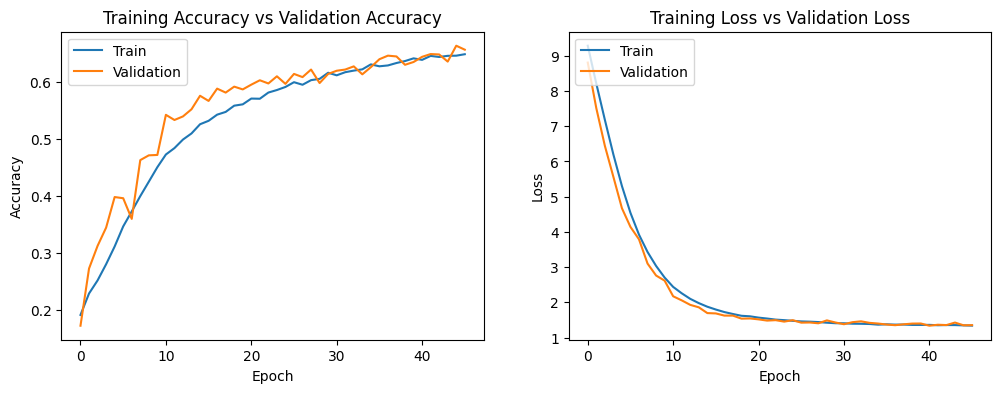

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [11]:
model.save('model_CNN.keras')

In [16]:
from tensorflow.keras.preprocessing import image


(48, 48)


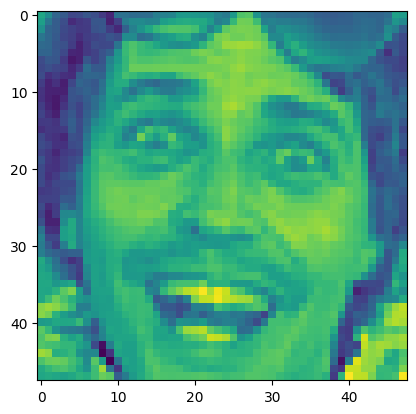

In [17]:
img = image.load_img("../input/emotion-detection-fer/test/happy/im1021.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [18]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [19]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[0.0, 0.0, 3.9976388e-07, 0.99999964, 0.0, 0.0, 1.5244399e-22]


In [20]:
img_index = result.index(max(result))
print(label_dict[img_index])

Happy
